In [2]:
# Add directory above current directory to path
import sys as SYS; SYS.path.insert(0, '..')

# for saving
import os

from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt

from src import setup
# setup.use_gpu()

In [3]:
from src import ( 
    measurements as measure,
    density_matrix as DM,
    simulation as sim,
    orders,
    random_unitary,
    simulation)

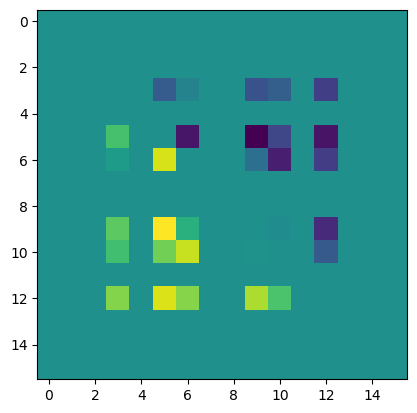

In [4]:
sub_hamilotnian = random_unitary.random_hamiltonian_in_subspace_coppying_mathematica(4,2)
plt.imshow(np.real((-1j*sub_hamilotnian).data.toarray()))

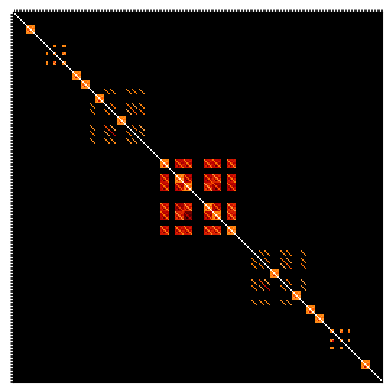

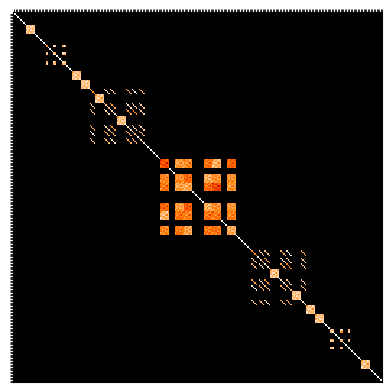

True

In [6]:
identity = DM.Identity(DM.energy_basis(4))

sub_hamilotnian = random_unitary.random_hamiltonian_in_subspace(4,2)
total_hamiltonian = identity.tensor(sub_hamilotnian)+sub_hamilotnian.tensor(identity)

unitary = DM.dm_exp(-1j * total_hamiltonian * .1)
unitary.change_to_energy_basis()
unitary.plot()

trial_sub_unitary = random_unitary.random_unitary_in_subspace(4,2)
U = trial_sub_unitary.tensor(identity)*identity.tensor(trial_sub_unitary)
U.change_to_energy_basis()
U.plot()

# check if they have the same non-zero elements
not ((U.data.toarray()!=0)^(unitary.data.toarray()!=0)).any()

In [15]:
N = 8
num_chunks = 2
num_iterations = 500
measurments = [measure.pops, measure.extractable_work_of_each_qubit]

initial_pops = [.2 for _ in range(N)]
initial_pops[4] = .4

num_samples = 100

In [16]:
# orderings
gas_orderings = orders.n_random_gas_orders(num_qbits=N,chunk_sizes = [4,4],n = num_iterations)
line_orderings= orders.n_random_line_orders(num_qbits=N,chunk_sizes = [4,4],n = num_iterations)
five_orderings = orders.n_8qbit_c5_orders(n = num_iterations)
messenger_orderings = orders.n_alternating_messenger_orders(num_qbits=N,n=num_iterations)

orderings = [gas_orderings,line_orderings,five_orderings,messenger_orderings]


titles = ["seven","six","five","messenger"]
results = defaultdict(lambda: defaultdict(list))

for i,ordering in enumerate(orderings):
    results[titles[i]]["pops"] = []
    results[titles[i]]["ex_work"] = []
    for index in range(num_samples):
        
        sub_unitary = random_unitary.random_unitary_in_subspace(4,2)
        unitary = sub_unitary.tensor(identity)*identity.tensor(sub_unitary)

        system = DM.n_thermal_qbits(initial_pops)
        system.change_to_energy_basis()

        data = sim.run(system,
                          measurement_set = measurments,
                          num_iterations = num_iterations,
                          orders = ordering,
                          Unitaries = unitary
                          )[0];

        if index %10==0: print(index)
        
        results[titles[i]]["pops"].append(data[0])
        results[titles[i]]["ex_work"].append(data[1])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46

In [7]:
trial = 'messenger'
processed_samples_gas = [np.sum(np.diff(results[20:],1,0)>0,0)/num_iterations for results in results[trial]["ex_work"]]
gas_sample_pops = results[trial]["pops"]
gas_samples_extractable_work = results[trial]["ex_work"]

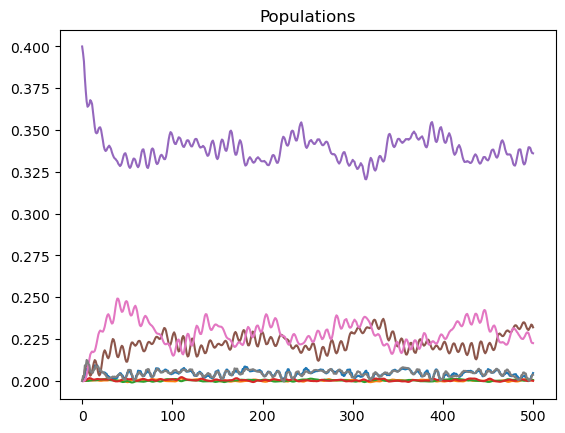

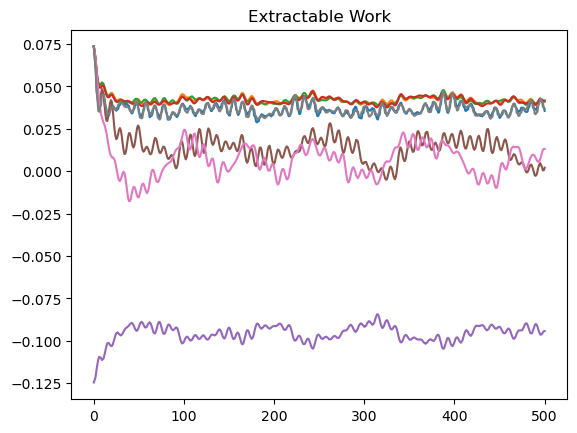

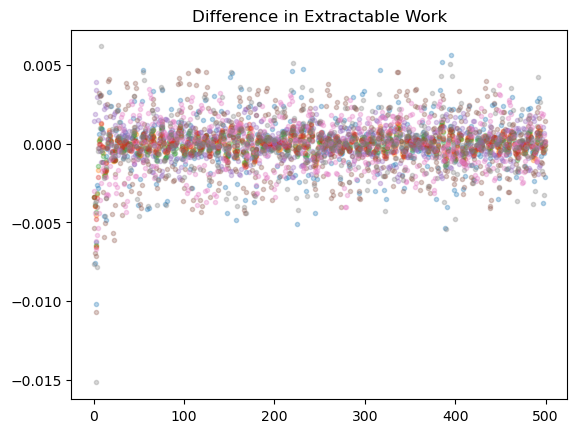

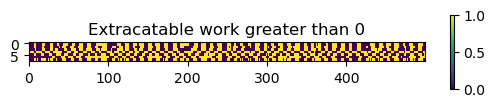

In [7]:
index = 0
start = 0
plt.plot(gas_sample_pops[index])
plt.title("Populations")
plt.show()
plt.plot(gas_samples_extractable_work[index])
plt.title("Extractable Work")
plt.show()
plt.plot([np.diff(results,1,0)for results in gas_samples_extractable_work][index],'.',alpha = .3)
plt.title("Difference in Extractable Work")
plt.show()
plt.imshow([np.diff(results,1,0)for results in gas_samples_extractable_work][index].T>0,aspect=3, interpolation='none')
plt.title("Extracatable work greater than 0")
plt.colorbar(shrink=0.2)
plt.show()


In [13]:
processed_cold["seven"].shape

(100,)

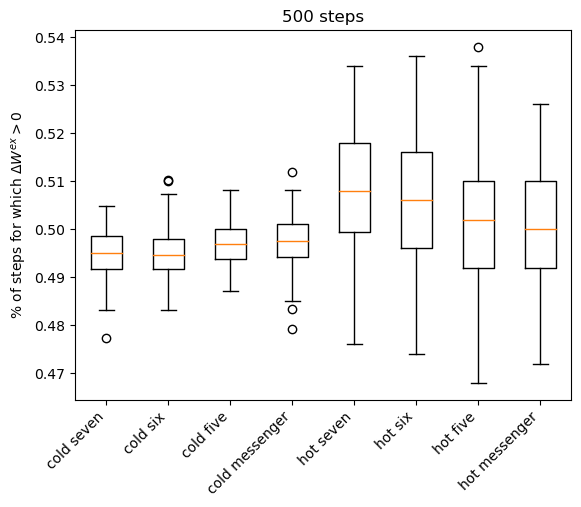

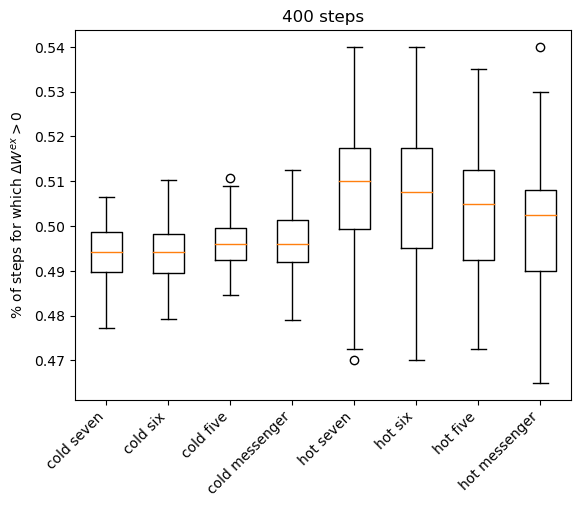

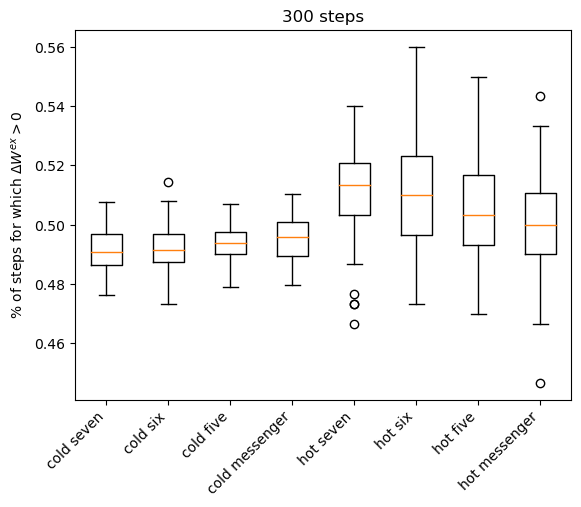

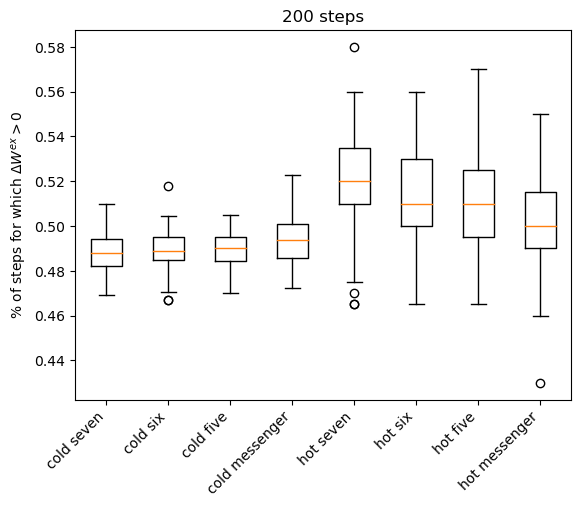

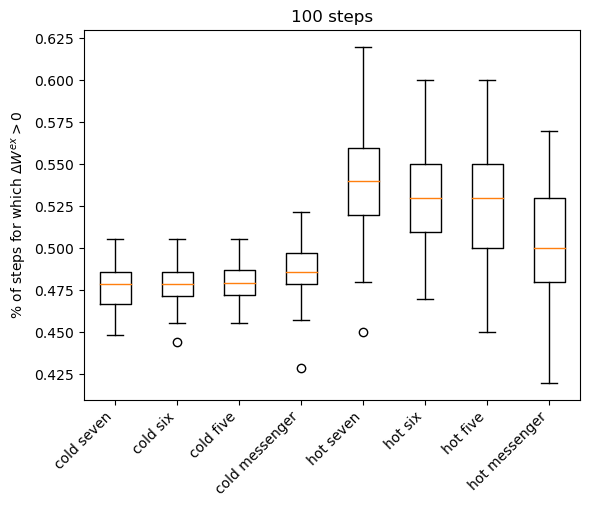

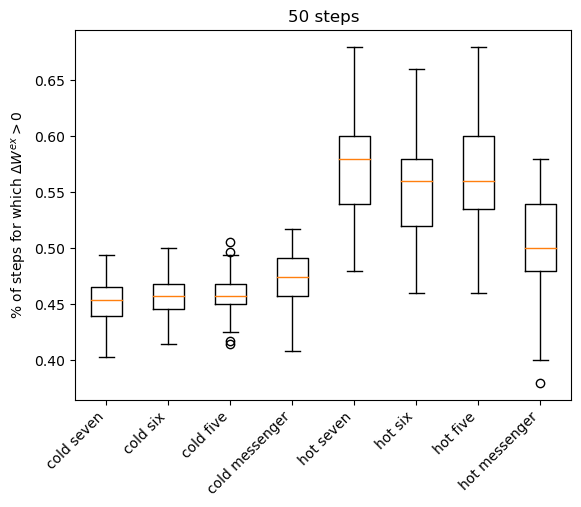

In [10]:
for n in [500,400,300,200,100,50]:

    processed_hot =  defaultdict(list)
    processed_cold =  defaultdict(list)
    for connectivity in results:
        processed_samples = np.array([np.sum(np.diff(res[:n],1,0)>0,0)/n for res in results[connectivity]["ex_work"]])
        processed_hot[connectivity] = processed_samples[:,4]
        processed_cold[connectivity] = np.mean(processed_samples[:,[0,1,2,3,5,6,7]],1).flatten()

    labels = ["cold " + key for key in processed_cold.keys()]+["hot " + key for key in processed_hot.keys()]
    fig, ax = plt.subplots()
    ax.boxplot(list(processed_cold.values())+list(processed_hot.values()),labels = labels)
    plt.ylabel("% of steps for which $\Delta W^{ex}>0$")
    plt.xticks(rotation=45, ha="right")
    plt.title(str(n) + " steps")
    # plt.ylim(0,1)
    plt.savefig(str(n)+"_steps_duplicate")

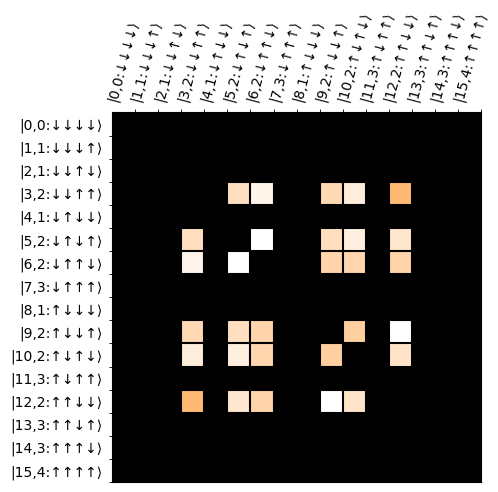

In [10]:
sub_hamilotnian = random_unitary.random_hamiltonian_in_subspace(4,2)
sub_hamilotnian.change_to_canonical_basis()
sub_hamilotnian.plot()

In [11]:
test = np.array([np.diff(res,1,0) for res in results[connectivity]["ex_work"]])

In [12]:
np.array(list(processed_cold['seven'])).shape

(7000,)